In [1]:
import geojson
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Weekend
dates = np.arange(0, 10001, 1).tolist()

df = pd.read_csv("peaks_it_wn.csv", parse_dates=dates, infer_datetime_format=True)

In [3]:
df.head()

Unnamed: 0                   0                   1                   2  \
0          0 2013-11-02 19:00:00 2013-11-02 19:00:00 2013-11-02 19:00:00   
1          1 2013-11-09 08:50:00 2013-11-09 08:50:00 2013-11-09 08:50:00   
2          2 2013-11-09 11:40:00 2013-11-09 11:40:00 2013-11-09 11:40:00   
3          3 2013-11-09 11:50:00 2013-11-09 11:50:00 2013-11-09 11:50:00   
4          4 2013-11-10 14:50:00 2013-11-10 14:50:00 2013-11-10 14:50:00   

                    3                   4                   5  \
0 2013-11-02 19:00:00 2013-11-02 19:00:00 2013-11-02 19:00:00   
1 2013-11-09 08:50:00 2013-11-09 08:50:00 2013-11-09 08:50:00   
2 2013-11-09 11:40:00 2013-11-09 11:40:00 2013-11-09 11:40:00   
3 2013-11-09 11:50:00 2013-11-09 11:50:00 2013-11-09 11:50:00   
4 2013-11-10 14:50:00 2013-11-10 14:50:00 2013-11-10 14:50:00   

                    6                   7                   8  ...  \
0 2013-11-02 19:00:00 2013-11-02 19:00:00 2013-11-02 19:00:00  ...   
1 2013-11-09 08:50:00 2013-11-09 08:50:00 2013-11-09 08:50:00  ...   
2 2013-11-09 11:40:00 2013-11-09 11:40:00 2013-11-09 11:40:00  ...   
3 2013-11-09 11:50:00 2013-11-09 11:50:00 2013-11-09 11:50:00  ...   
4 2013-11-10 14:50:00 2013-11-10 14:50:00 2013-11-10 14:50:00  ...   

                 9990                9991                9992  \
0 2013-11-03 11:10:00 2013-11-03 21:50:00 2013-11-09 20:30:00   
1 2013-11-09 14:30:00 2013-11-09 14:30:00 2013-11-02 09:40:00   
2 2013-11-09 12:00:00 2013-11-09 12:00:00 2013-11-02 17:10:00   
3 2013-11-02 12:10:00 2013-11-09 10:50:00 2013-11-09 12:30:00   
4 2013-11-09 14:50:00 2013-11-09 14:50:00 2013-11-03 18:50:00   

                 9993                9994                9995  \
0 2013-11-09 20:30:00 2013-11-09 17:30:00 2013-11-10 13:40:00   
1 2013-11-09 06:30:00 2013-11-09 06:30:00 2013-11-03 16:20:00   
2 2013-11-02 17:10:00 2013-11-09 11:40:00 2013-11-10 18:40:00   
3 2013-11-09 09:50:00 2013-11-09 11:30:00 2013-11-09 11:30:00   
4 2013-11-03 18:50:00 2013-11-03 18:50:00 2013-11-10 16:10:00   

                 9996                9997                9998  \
0 2013-11-10 13:40:00 2013-11-10 13:40:00 2013-11-10 18:10:00   
1 2013-11-09 06:30:00 2013-11-09 06:30:00 2013-11-09 06:30:00   
2 2013-11-09 11:00:00 2013-11-10 18:40:00 2013-11-09 12:30:00   
3 2013-11-09 09:40:00 2013-11-09 09:40:00 2013-11-09 11:30:00   
4 2013-11-09 14:10:00 2013-11-09 14:10:00 2013-11-10 17:10:00   

                 9999  
0 2013-11-10 18:10:00  
1 2013-11-09 10:10:00  
2 2013-11-02 11:50:00  
3 2013-11-02 12:10:00  
4 2013-11-02 17:10:00  

[5 rows x 10001 columns]

In [4]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
smsin=[]
for i in columns:
    if "Unnamed" in i:
        continue
    smsin.append(df[i][0].hour)

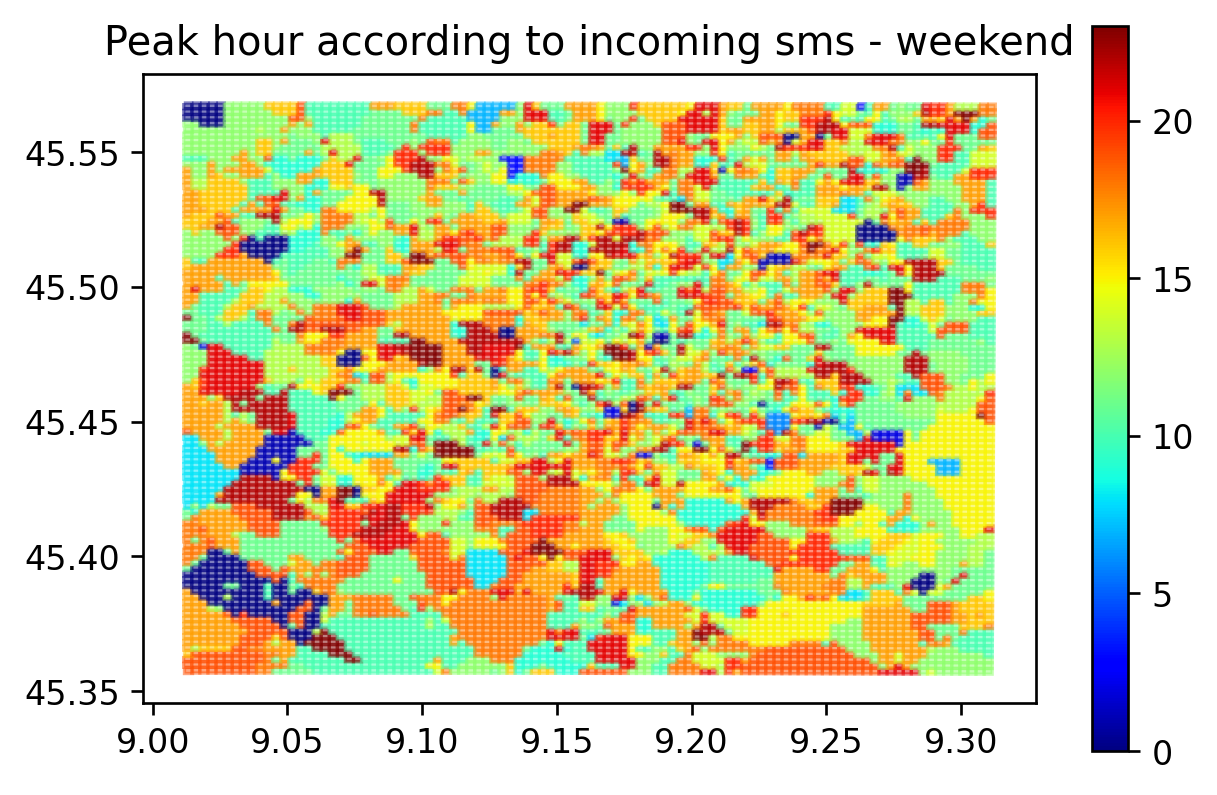

In [5]:
from descartes import PolygonPatch
#from mpl_toolkits.basemap import Basemap
with open("./geojsons/milano-grid.geojson") as json_file:
    json_data = geojson.load(json_file)

#BLUE = '#6699cc'
fig = plt.figure(dpi=240) 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=np.max(smsin))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
cco=[]
for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(smsin[i])
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    cco.append(colorVal)
    
ax.axis('scaled')
ax.set_title("Peak hour according to incoming sms - weekend")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax)

plt.show()

In [16]:
import folium
import geopandas as gpd
bins = list([0, 7, 10, 13, 16, 18, 22])
m = folium.Map(
    location=[45.5, 9.3],
)

#print (cco)
style = lambda x: {'fillcolor':cco}

folium.Choropleth(json_data,                                # geo data
                  data=json_data,
                  key_on='feature.properties.cellId',
                  fill_color='RdPu',                        # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,
                  legend_name='Peak hour - smsin').add_to(m)

folium.LayerControl().add_to(m)
   
#gdf = gpd.read_file('./milano-grid.geojson')
#gdf.plot(figsize=(20,12), edgecolor=cco,facecolor=cco, linewidth=0.5, alpha=0.35).add_to(m)

m.save('sms.html')

/home/manu/.local/lib/python3.6/site-packages/folium/features.py:1212: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  real_values = np.array(list(color_data.values()))


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [7]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
smsout=[]
for i in columns:
    if "Unnamed" in i:
        continue
    smsout.append(df[i][1].hour)
    

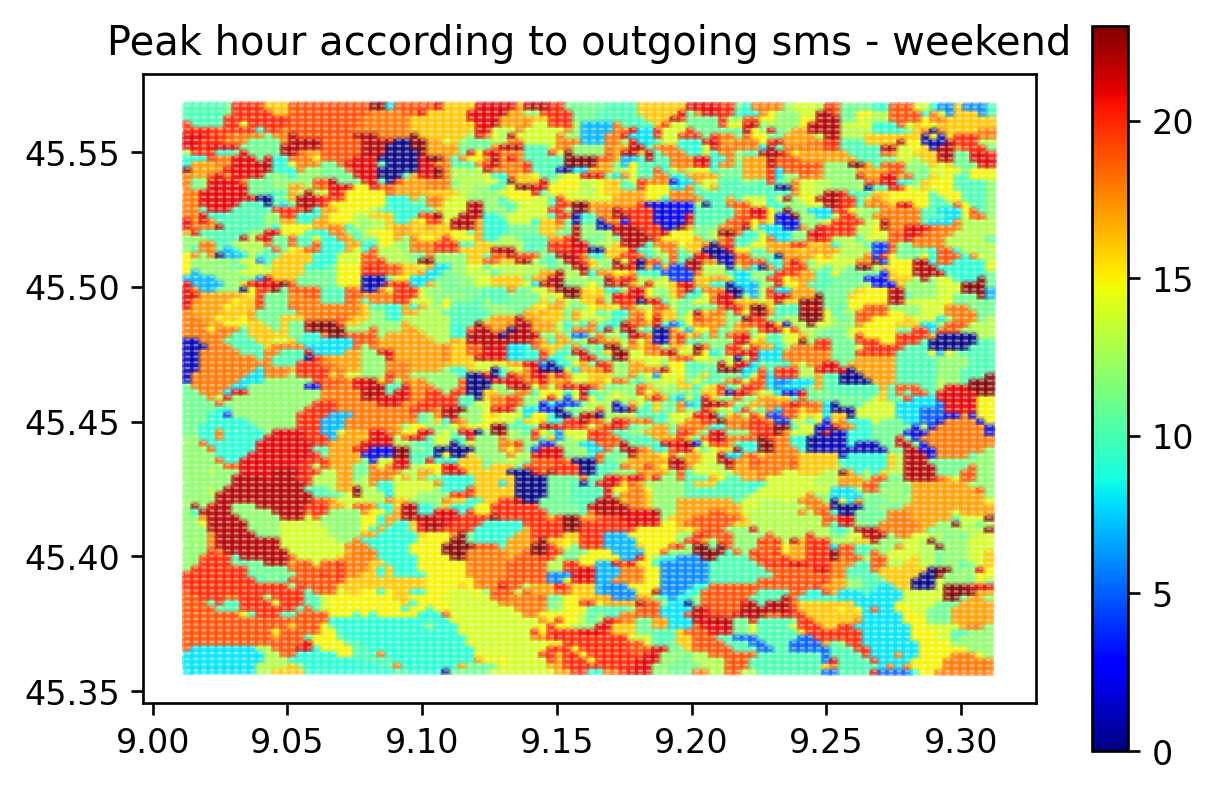

In [8]:
#BLUE = '#6699cc'
fig = plt.figure(dpi=240) 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=np.max(smsout))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(smsout[i]) #0-9999
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    
ax.axis('scaled')
ax.set_title("Peak hour according to outgoing sms - weekend")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax)

plt.show()

In [9]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
callin=[]
for i in columns:
    if "Unnamed" in i:
        continue
    callin.append(df[i][2].hour)
    

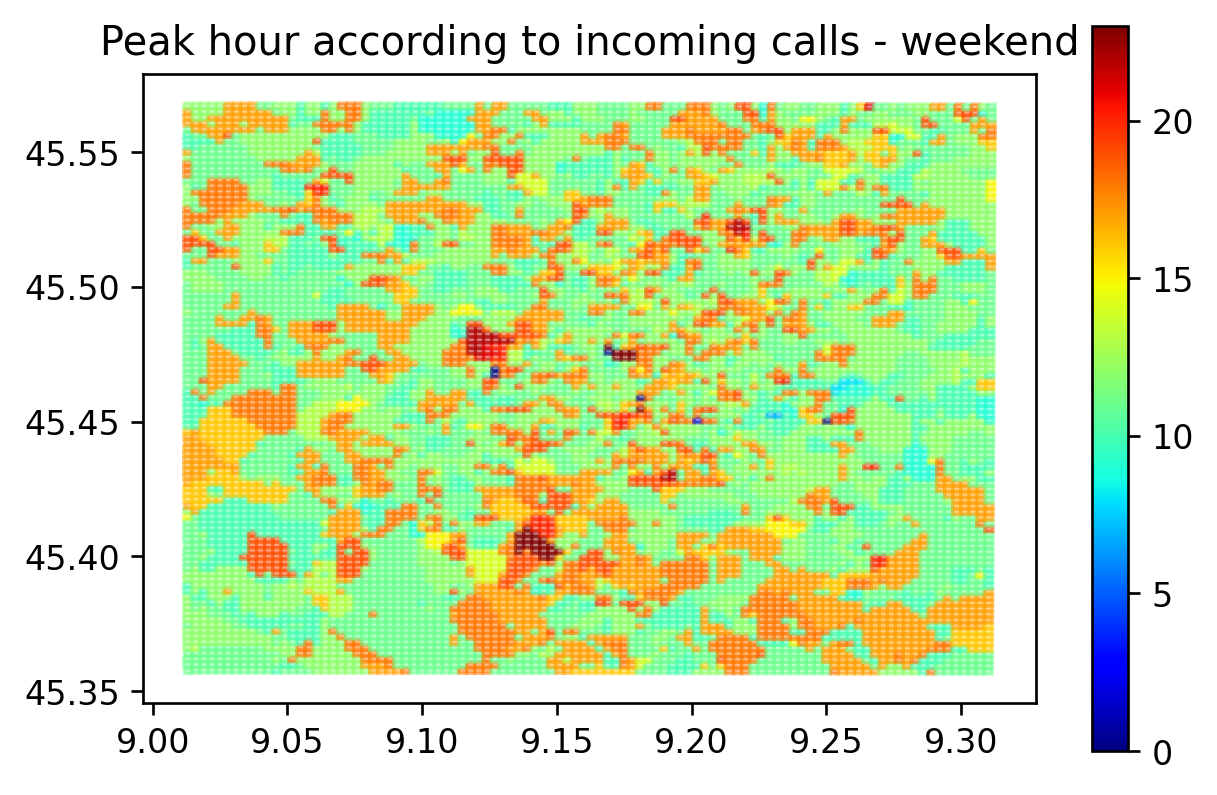

In [10]:
#BLUE = '#6699cc'
fig = plt.figure(dpi=240) 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=np.max(callin))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(callin[i]) #0-9999
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    
ax.axis('scaled')
ax.set_title("Peak hour according to incoming calls - weekend")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax)

plt.show()

In [11]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
callout=[]
for i in columns:
    if "Unnamed" in i:
        continue
    callout.append(df[i][3].hour)


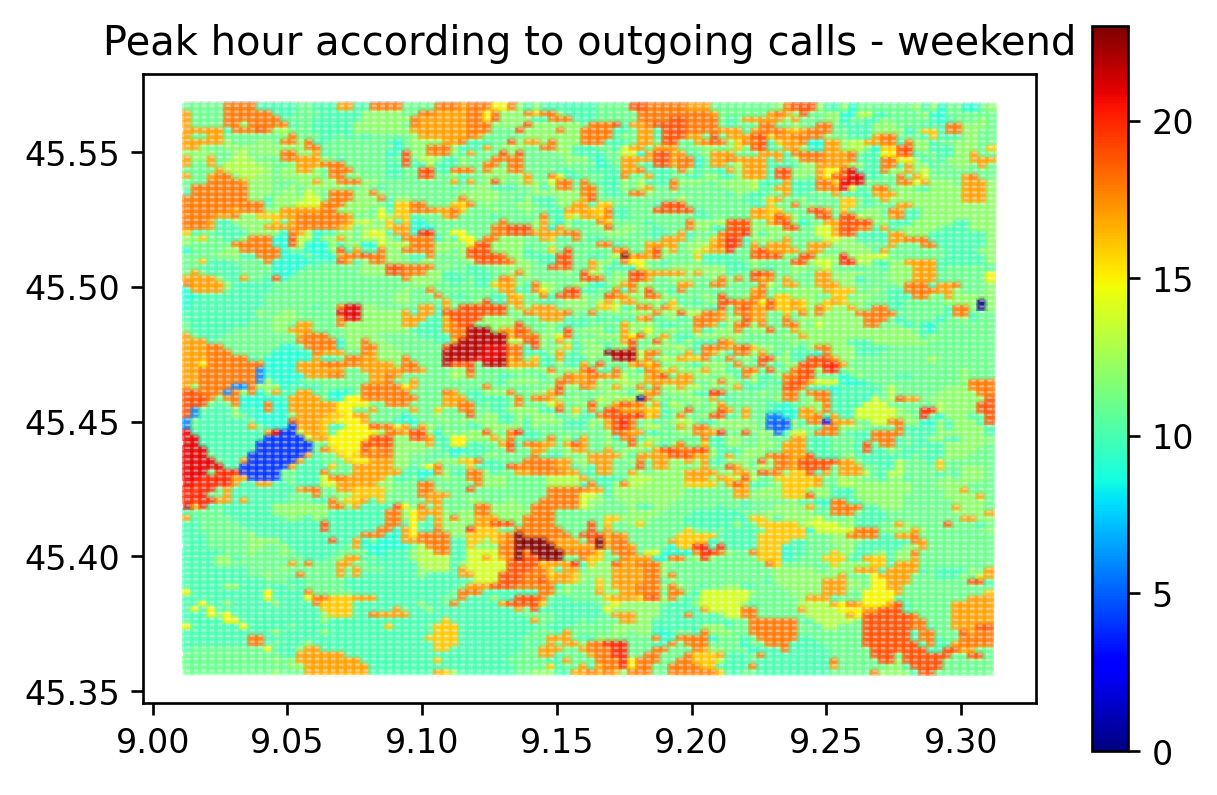

In [12]:
#BLUE = '#6699cc'
fig = plt.figure(dpi=240) 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=np.max(callout))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(callout[i]) #0-9999
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    
ax.axis('scaled')
ax.set_title("Peak hour according to outgoing calls - weekend")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax)

plt.show()

In [13]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
internet=[]
for i in columns:
    if "Unnamed" in i:
        continue
    internet.append(df[i][4].hour)


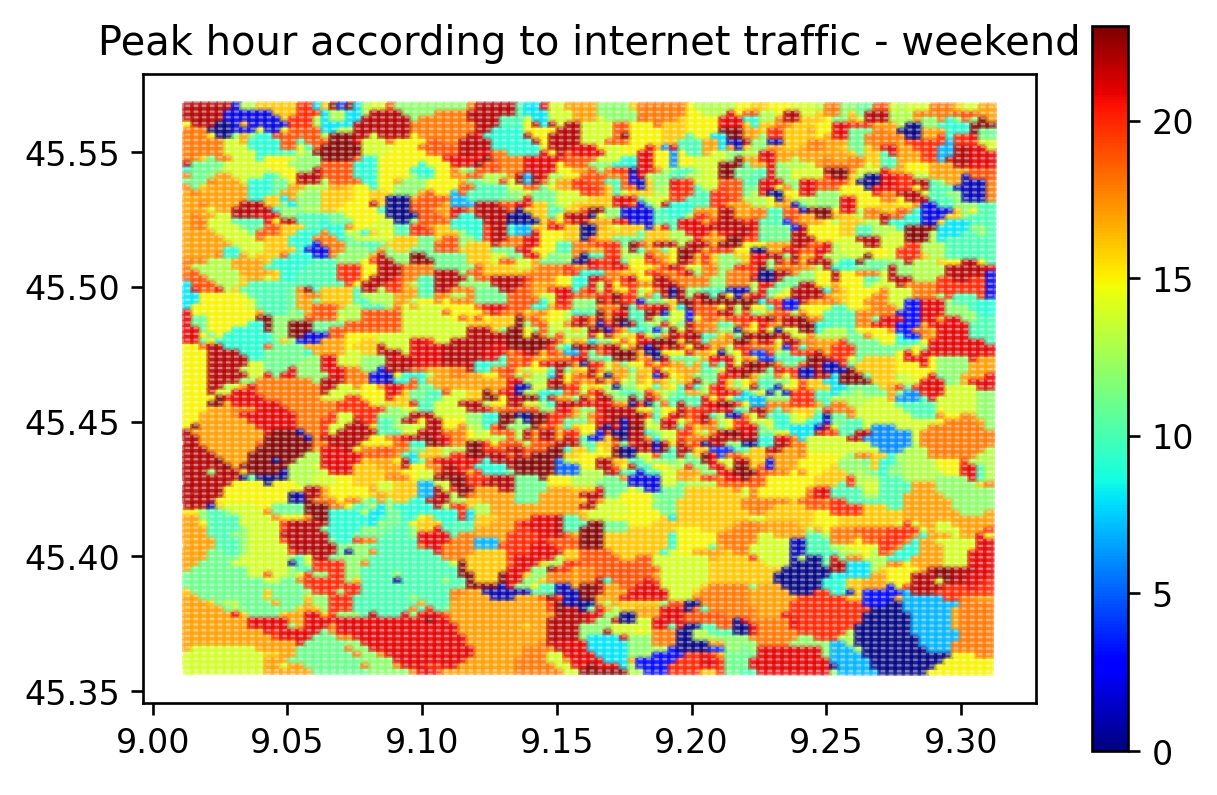

In [14]:
#BLUE = '#6699cc'
fig = plt.figure(dpi=240) 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=np.max(internet))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(internet[i]) #0-9999
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    
ax.axis('scaled')
ax.set_title("Peak hour according to internet traffic - weekend")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax)

plt.show()